In [1]:
import optuna
import pandas as pd

from hp_pred.test_model import Test_Model

optuna.logging.set_verbosity(optuna.logging.WARNING)

c:\Users\pret.PORTPRETLAMIH11\Desktop\PIH\BIS-MAP-Pred\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train = pd.read_csv('./data/features_extracted/train.csv')
test = pd.read_csv('./data/features_extracted/test.csv')

FEATURE_NAME = list(test.columns.difference(['label','cv_split']))

Model XGBoost_ROC loaded
Number of points in test data: 228
Prevalence of positive class: 40.35%
---
Model XGBoost_PR loaded
Number of points in test data: 228
Prevalence of positive class: 40.35%
---
Model Rotation Forest loaded
Number of points in test data: 228
Prevalence of positive class: 40.35%
---
Model Random Forest loaded
Number of points in test data: 228
Prevalence of positive class: 40.35%
---
Model Logistic Regression  loaded
Number of points in test data: 228
Prevalence of positive class: 40.35%
---
Initialized 5 models for visualization
Generating predictions...
Generating predictions for XGBoost_ROC...
Generating predictions for XGBoost_PR...
Generating predictions for Rotation Forest...
Generating predictions for Random Forest...
Generating predictions for Logistic Regression ...
Plotting ROC curves...


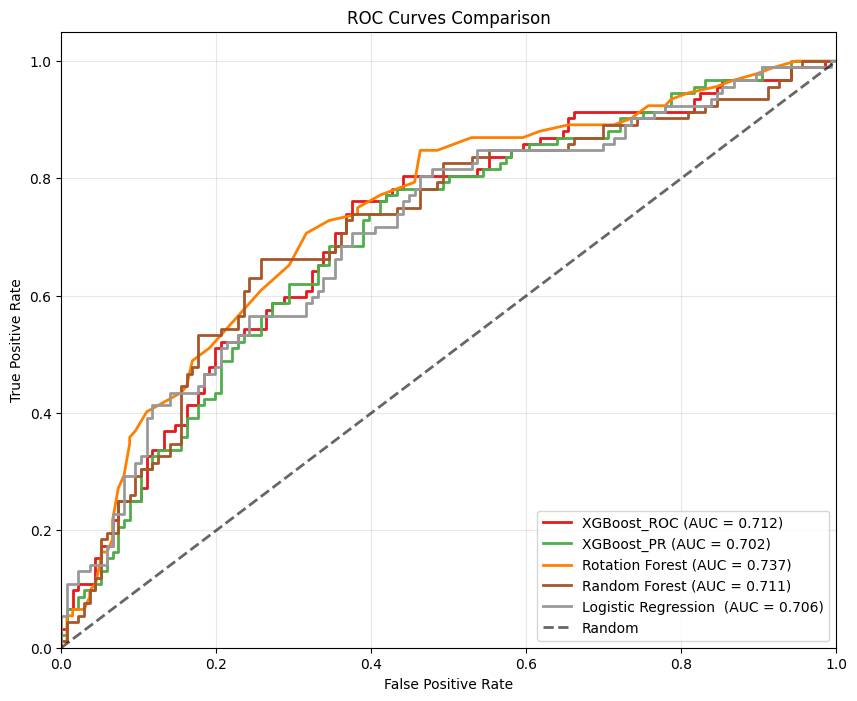

Plotting Precision-Recall curves...


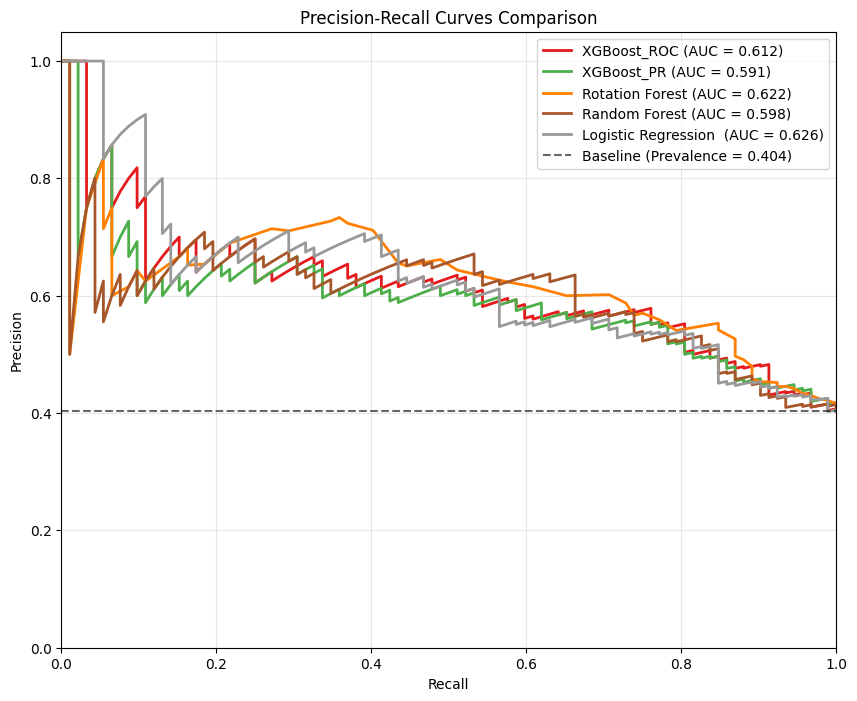

Computing and plotting SHAP values...
Computing SHAP values for XGBoost_ROC...


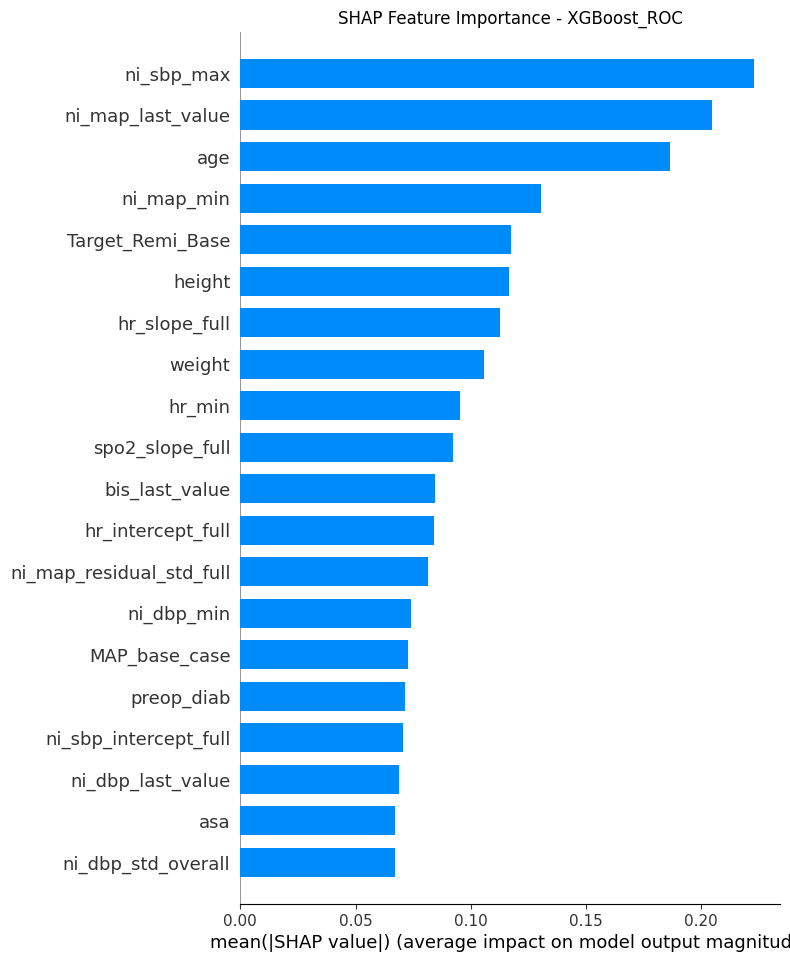

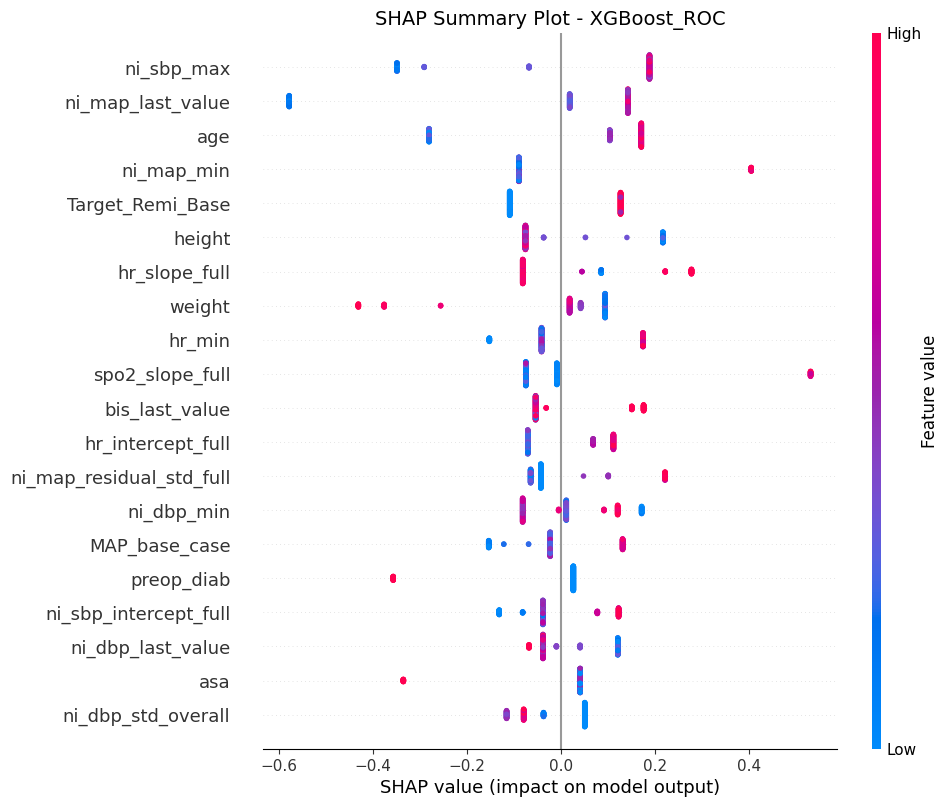

Computing SHAP values for XGBoost_PR...


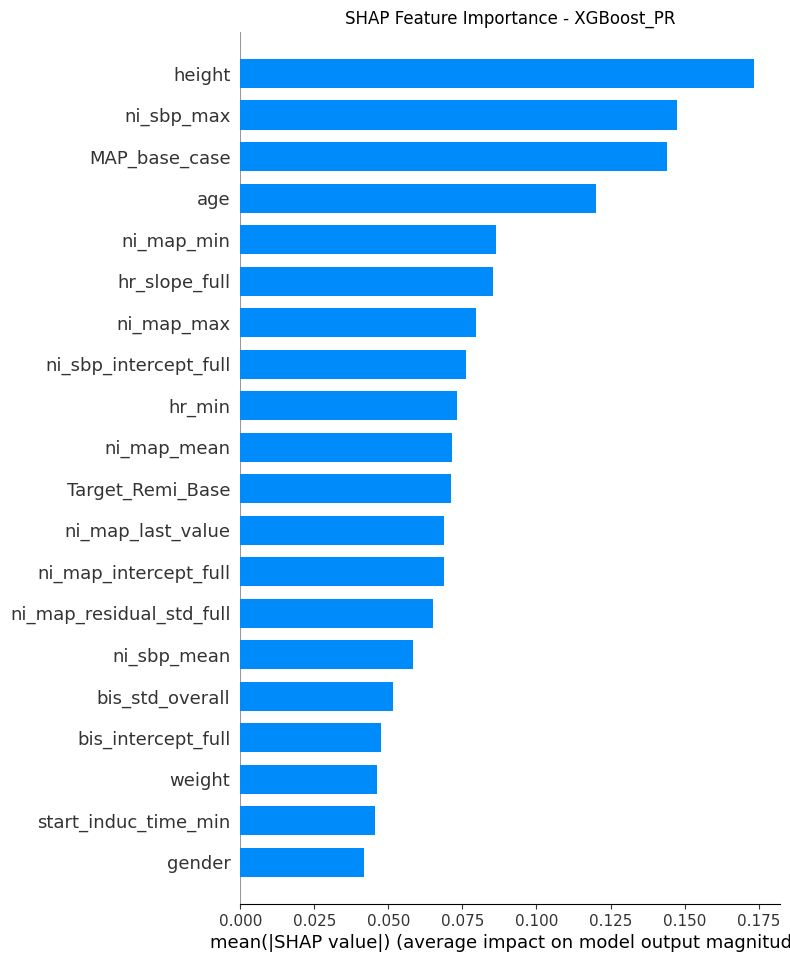

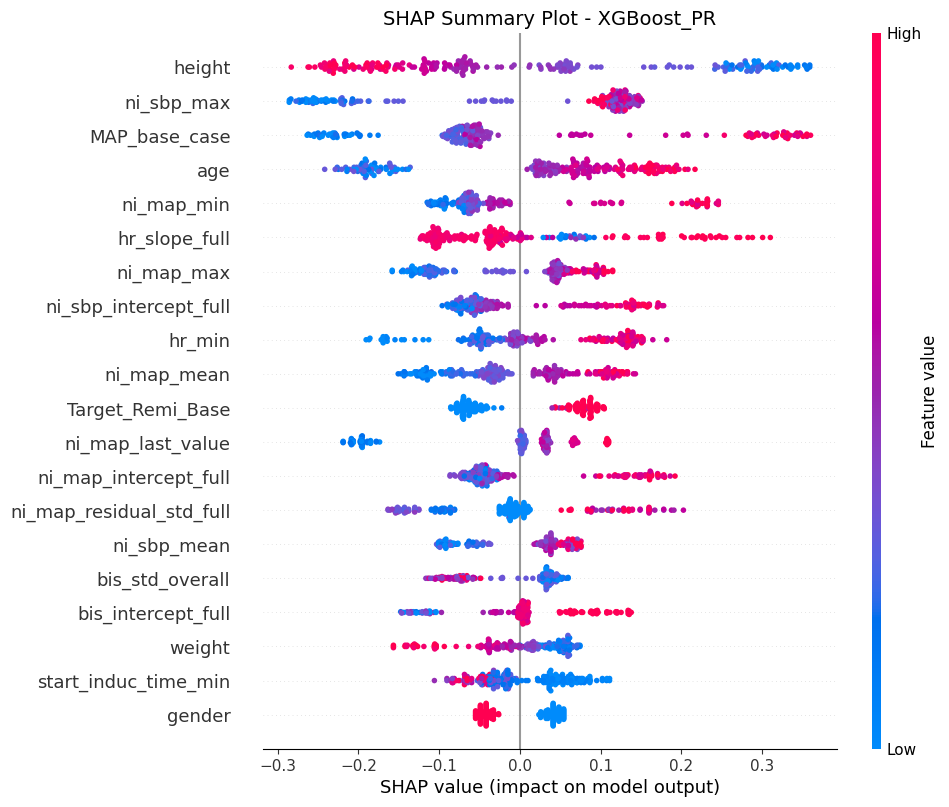

Computing SHAP values for Rotation Forest...
Error computing SHAP values for Rotation Forest: The passed model is not callable and cannot be analyzed directly with the given masker! Model: RotationForestClassifier(n_estimators=59, random_state=42,
                         remove_proportion=0.8729188669457949)
Computing SHAP values for Random Forest...
Error computing SHAP values for Random Forest: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.442073, while the model output was 0.447205. If this difference is acceptable you can set check_additivity=False to disable this check.
Computing SHAP values for Logistic Regression ...


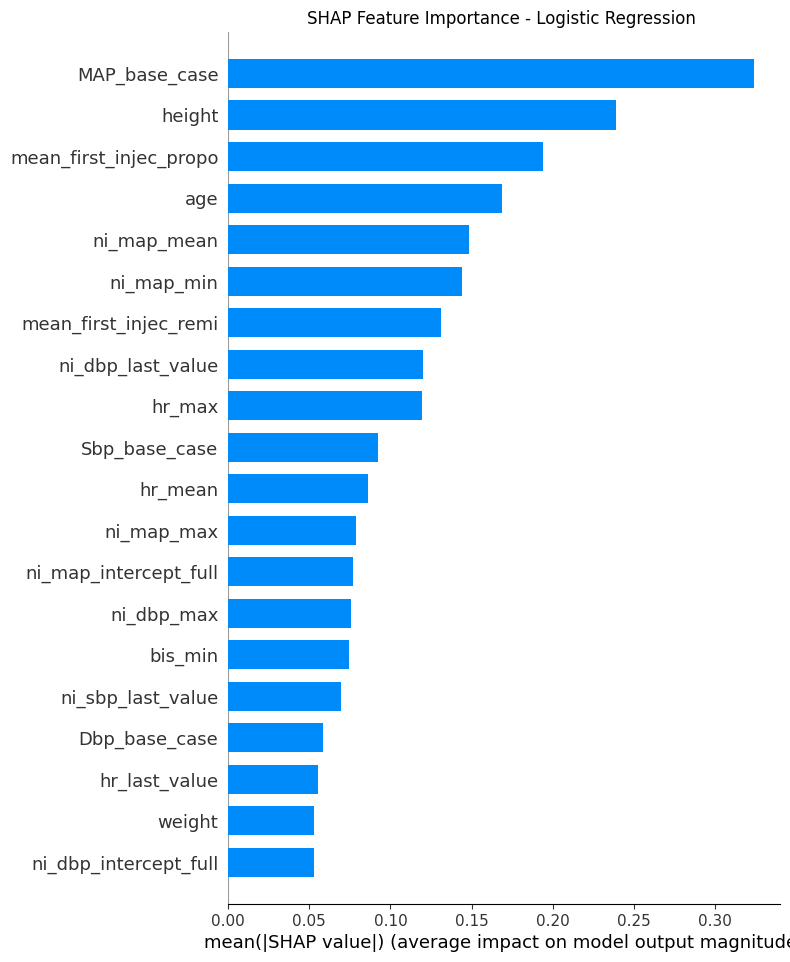

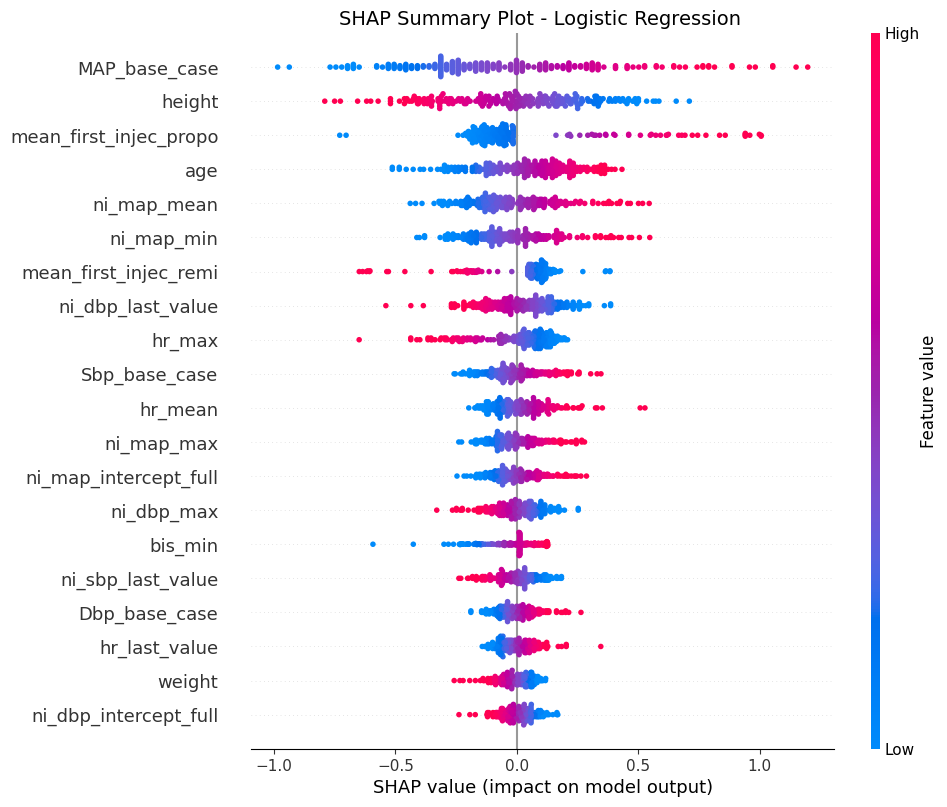

In [3]:
model_configs = [
    {
        'model_filename': 'xgb_model_opt_roc.json', 
        'test_data': test,
        'train_data': train, 
        'features_names': FEATURE_NAME,
        'name': 'XGBoost_ROC',
        'model_type': 'xgboost',
    },
    {
        'model_filename': 'xgb_model_opt.json', 
        'test_data': test,
        'train_data': train, 
        'features_names': FEATURE_NAME,
        'name': 'XGBoost_PR',
        'model_type': 'xgboost',
    },
    {
        'model_filename': 'rotationforest_model_opt.pkl', 
        'test_data': test,
        'train_data': train, 
        'features_names': FEATURE_NAME,
        'name': 'Rotation Forest',
        'model_type': 'other',
    },
    {
        'model_filename': 'rf_opt.pkl', 
        'test_data': test,
        'train_data': train, 
        'features_names': FEATURE_NAME,
        'name': 'Random Forest',
        'model_type': 'other',
    },
    {
        'model_filename': 'logreg_model_opt.pkl', 
        'test_data': test,
        'train_data': train, 
        'features_names': FEATURE_NAME,
        'name': 'Logistic Regression ',
        'model_type': 'other',
    },
]

# Initialize and run
evaluator = Test_Model(
    model_configs=model_configs,
    output_name="RFE")

evaluator.run()